# Classifying hand written digits using Neural Network

In [1]:
import numpy as np
import sklearn

In [24]:
from pathlib import Path

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
import tensorflow as tf

2023-04-06 02:41:26.441168: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255. #scaling the features to 0-1 using range which is pixel density

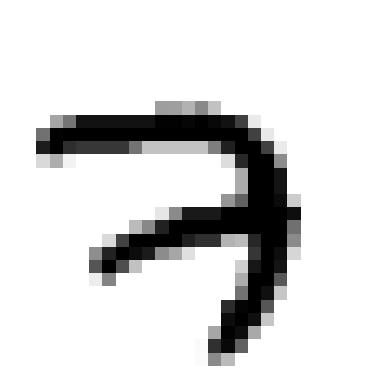

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [10]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
X_valid.shape

(5000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

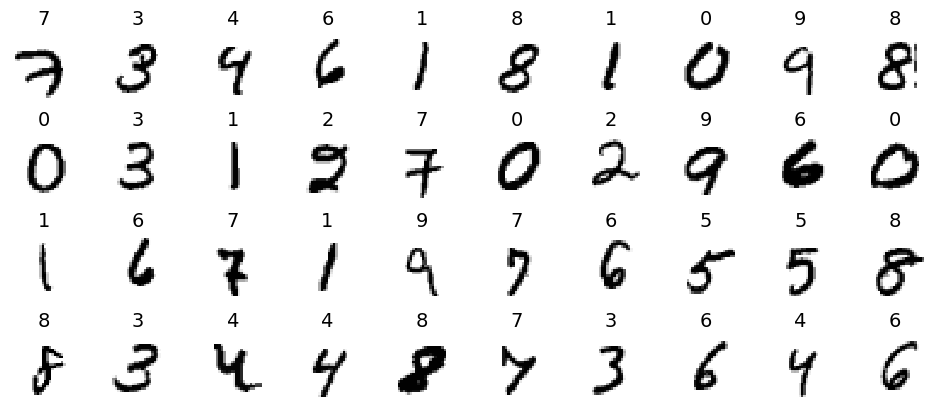

In [13]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [14]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [15]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

2023-04-06 02:50:08.131292: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 02:50:08.131762: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [18]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 16s 9ms/step - loss: nan - accuracy: 0.5786 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

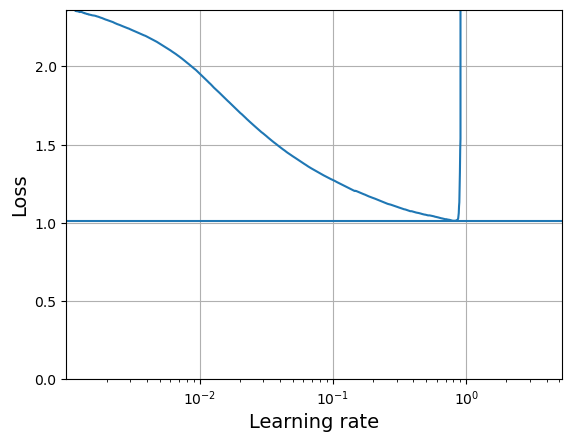

In [19]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [20]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [22]:
optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [25]:
run_index = 1 # increment this at every run
run_logdir = Path() / "my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

PosixPath('my_mnist_logs/run_001')

In [26]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1710/1719 [============================>.] - ETA: 0s - loss: 0.2352 - accuracy: 0.9260

INFO:tensorflow:Assets written to: my_mnist_model/assets


INFO:tensorflow:Assets written to: my_mnist_model/assets


1719/1719 [==============================] - 15s 8ms/step - loss: 0.2345 - accuracy: 0.9263 - val_loss: 0.1070 - val_accuracy: 0.9706
Epoch 2/100
1709/1719 [============================>.] - ETA: 0s - loss: 0.0950 - accuracy: 0.9710

INFO:tensorflow:Assets written to: my_mnist_model/assets


INFO:tensorflow:Assets written to: my_mnist_model/assets


1719/1719 [==============================] - 12s 7ms/step - loss: 0.0952 - accuracy: 0.9709 - val_loss: 0.1054 - val_accuracy: 0.9704
Epoch 3/100
1711/1719 [============================>.] - ETA: 0s - loss: 0.0642 - accuracy: 0.9798

INFO:tensorflow:Assets written to: my_mnist_model/assets


INFO:tensorflow:Assets written to: my_mnist_model/assets


1719/1719 [==============================] - 14s 8ms/step - loss: 0.0641 - accuracy: 0.9799 - val_loss: 0.0732 - val_accuracy: 0.9814
Epoch 4/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0488 - accuracy: 0.9845 - val_loss: 0.0753 - val_accuracy: 0.9796
Epoch 5/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0360 - accuracy: 0.9878 - val_loss: 0.0763 - val_accuracy: 0.9792
Epoch 6/100
1713/1719 [============================>.] - ETA: 0s - loss: 0.0303 - accuracy: 0.9903

INFO:tensorflow:Assets written to: my_mnist_model/assets


INFO:tensorflow:Assets written to: my_mnist_model/assets


1719/1719 [==============================] - 12s 7ms/step - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.0700 - val_accuracy: 0.9832
Epoch 7/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0208 - accuracy: 0.9928 - val_loss: 0.0828 - val_accuracy: 0.9818
Epoch 8/100
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.0908 - val_accuracy: 0.9794
Epoch 9/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0156 - accuracy: 0.9948 - val_loss: 0.0956 - val_accuracy: 0.9798
Epoch 10/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.0852 - val_accuracy: 0.9822
Epoch 11/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.0854 - val_accuracy: 0.9850
Epoch 12/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.1027 - val_accu

In [27]:
model = tf.keras.models.load_model("my_mnist_model") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0695 - accuracy: 0.9813


[0.06948527693748474, 0.9812999963760376]

In [ ]:
%tensorboard --logdir=./my_mnist_logs